# Project1 Level1

**1. Data Loading and Cleaning: Load the retail sales dataset.**

In [ ]:
import pandas as pd

df = pd.read_csv('retail_sales_dataset.csv')

print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

df.drop_duplicates(inplace=True)

print(df.dtypes)

df['Date'] = pd.to_datetime(df['Date'])

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


**2. Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).**

In [ ]:
desc_stats = df.describe()
print(desc_stats)

mode = df.mode().iloc[0]
print(f"Mode:\n{mode}")


       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

**3. Time Series Analysis: Analyze sales trends over time using time series techniques.**

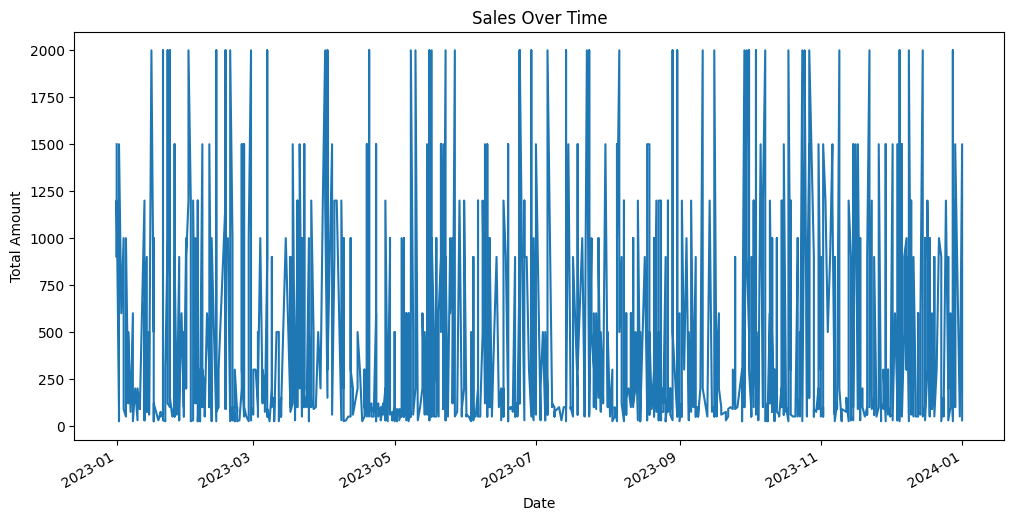

In [ ]:
import matplotlib.pyplot as plt

df.set_index('Date', inplace=True)

df['Total Amount'].plot(figsize=(12, 6))
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()


**4. Customer and Product Analysis: Analyze customer demographics and purchasing behavior.**

In [ ]:
# Customer analysis
customer_stats = df.groupby('Customer ID').agg({
    'Total Amount': ['count', 'mean', 'sum'],
    'Product Category': 'nunique'
}).reset_index()
customer_stats.columns = ['Customer ID', 'Purchase Count', 'Average Purchase', 'Total Spent', 'Unique Products']
print(customer_stats.head())

# Product analysis
product_stats = df.groupby('Product Category').agg({
    'Total Amount': ['count', 'mean', 'sum']
}).reset_index()
product_stats.columns = ['Product Category', 'Sales Count', 'Average Sales', 'Total Sales']
print(product_stats.head())


  Customer ID  Purchase Count  Average Purchase  Total Spent  Unique Products
0     CUST001               1             150.0          150                1
1     CUST002               1            1000.0         1000                1
2     CUST003               1              30.0           30                1
3     CUST004               1             500.0          500                1
4     CUST005               1             100.0          100                1
  Product Category  Sales Count  Average Sales  Total Sales
0           Beauty          307     467.475570       143515
1         Clothing          351     443.247863       155580
2      Electronics          342     458.786550       156905


**5. Visualization: Present insights through bar charts, line plots, and heatmaps.**

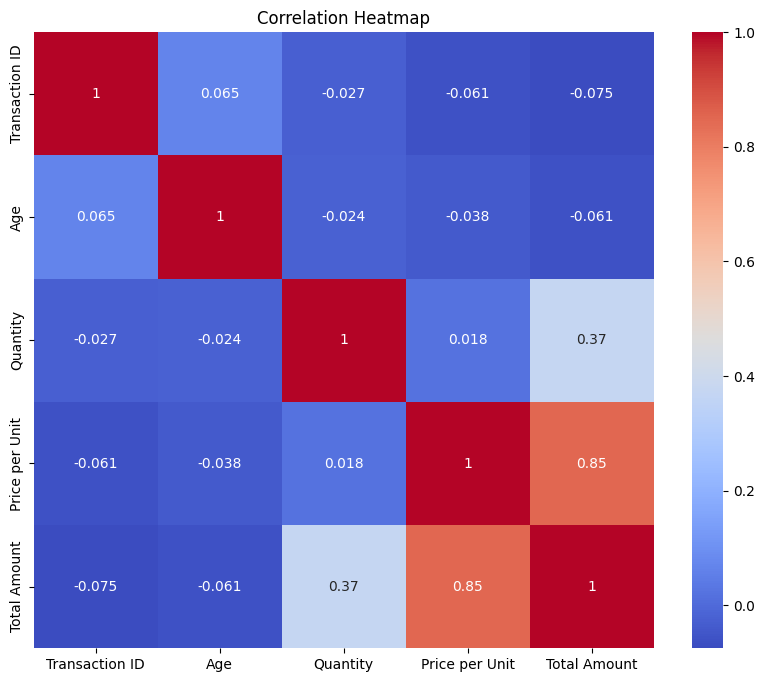

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**6. Recommendations: Provide actionable recommendations based on the EDA.**

Based on the insights gained from the analysis, here are some actionable recommendations:

Increase Stock for Top-Selling Products:

Ensure high inventory levels for product categories that generate the most sales, such as 'Clothing' and 'Electronics'.
Monitor stock levels more frequently during peak sales periods identified in the time series analysis.
Target High-Value Customers:

Develop personalized marketing campaigns for high-value customers identified in the customer analysis.
Offer loyalty programs and special discounts to encourage repeat purchases.
Optimize Pricing Strategy:

Analyze the price sensitivity of products with high average sales to determine optimal pricing strategies.
Consider promotional discounts for products with lower sales to boost their performance.
Enhance Customer Segmentation:

Segment customers based on demographics such as age and gender to tailor marketing efforts.
Create targeted advertisements and product recommendations for different customer segments.
Improve Marketing Efforts:

Increase marketing spend during peak sales periods to maximize revenue.
Utilize insights from the correlation analysis to target specific customer groups likely to spend more.
Product Bundling:

Create product bundles with high-selling and low-selling items to boost overall sales.
Offer discounts on bundles to make them more attractive to customers.
Seasonal Promotions:

Plan seasonal promotions based on the sales trends observed in the time series analysis.
Highlight popular products during holidays and peak seasons to drive more sales.gement.

# Project 2 Level 1

**1. Data Loading and Exploration**

In [ ]:
import pandas as pd

# Load the dataset
df_customers = pd.read_csv('ifood_df (1).csv')

# Display the first few rows of the dataframe to understand its structure
print(df_customers.head())

# Display basic information about the dataset
print(df_customers.info())

# Summary statistics of the dataset
print(df_customers.describe())


    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

**2. Data Cleaning**

In [ ]:
# Check for missing values
missing_values = df_customers.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (if any)
df_customers.fillna(method='ffill', inplace=True)

# Check for duplicates
duplicates = df_customers.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

# Remove duplicates
df_customers.drop_duplicates(inplace=True)


Missing Values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds      

**3. Descriptive Statistics**

In [ ]:
# Calculate average purchase value by aggregating different purchase types
df_customers['TotalPurchases'] = df_customers['NumDealsPurchases'] + df_customers['NumWebPurchases'] + df_customers['NumCatalogPurchases'] + df_customers['NumStorePurchases']
average_purchase_value = df_customers['TotalPurchases'].mean()

# Calculate purchase frequency (assuming frequency is the number of unique purchases per customer)
purchase_frequency = df_customers.groupby('TotalPurchases').size().mean()

print(f"Average Purchase Value: {average_purchase_value}")
print(f"Average Purchase Frequency: {purchase_frequency}")


Average Purchase Value: 14.897575457694211
Average Purchase Frequency: 54.62162162162162


**4. Customer Segmentation**

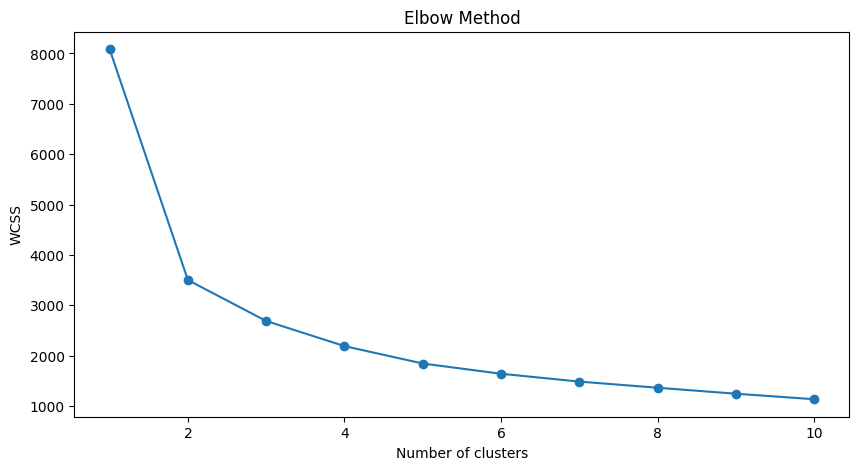

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Features for clustering
features = df_customers[['TotalPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 4  # Example, choose based on the Elbow Method graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df_customers['Cluster'] = clusters


**5. Visualization**

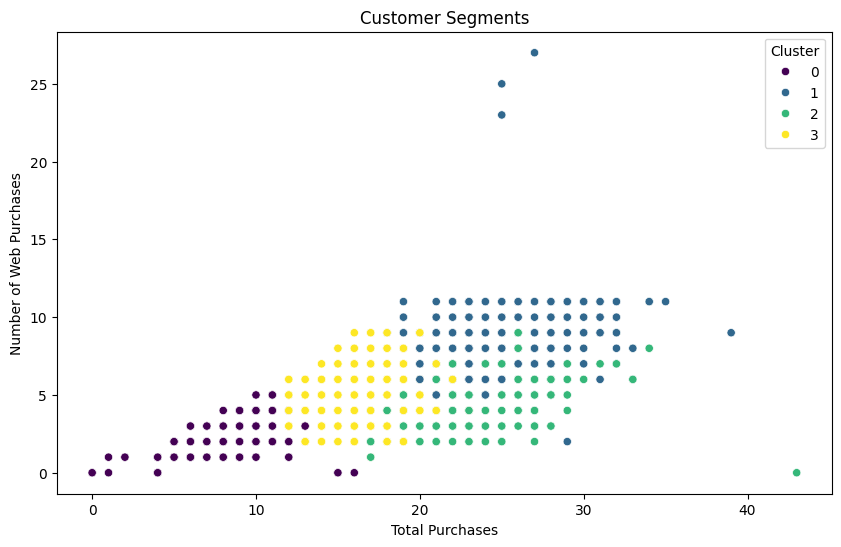

<ipython-input-39-d786be3a19c3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='TotalPurchases', data=cluster_summary, palette='viridis')


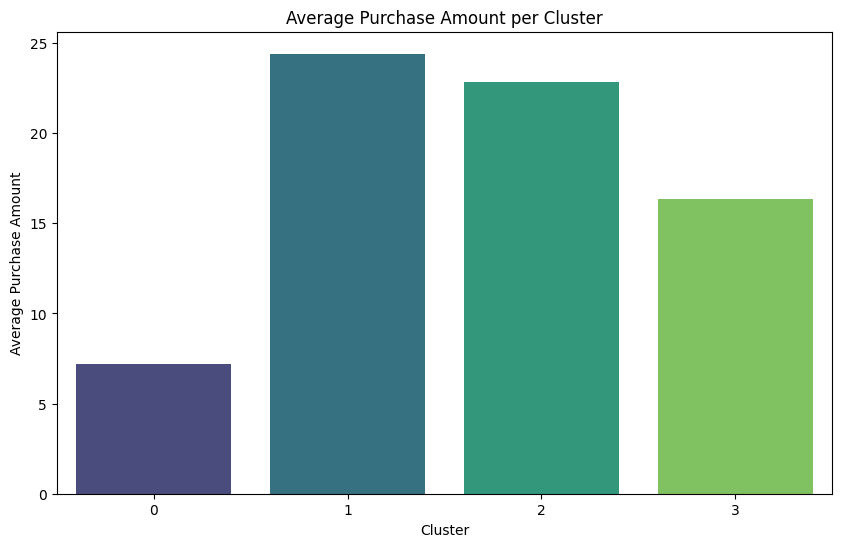

In [ ]:
import seaborn as sns

# Scatter plot for customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPurchases', y='NumWebPurchases', hue='Cluster', data=df_customers, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Purchases')
plt.ylabel('Number of Web Purchases')
plt.legend(title='Cluster')
plt.show()

# Bar chart for average purchase amount per cluster
cluster_summary = df_customers.groupby('Cluster').agg({'TotalPurchases': 'mean', 'NumWebPurchases': 'mean', 'NumCatalogPurchases': 'mean', 'NumStorePurchases': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='TotalPurchases', data=cluster_summary, palette='viridis')
plt.title('Average Purchase Amount per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Amount')
plt.show()


**6. Recommendations**
Based on the analysis, provide actionable recommendations tailored to each customer segment.

High-Value Customers:

Characteristics: High total purchases and high number of web/catalog/store purchases.
Recommendations: Offer loyalty programs, personalized discounts, and exclusive deals.
Frequent Shoppers:

Characteristics: Moderate total purchases but high frequency in specific purchase types (e.g., web or store).
Recommendations: Implement reward points system, frequent shopper discounts, and targeted email campaigns.
Occasional Shoppers:

Characteristics: Moderate to low total purchases and moderate purchase frequency.
Recommendations: Send reminder emails, offer limited-time promotions, and create engagement campaigns.
Low-Value Customers:

Characteristics: Low total purchases and low frequency across all purchase types.
Recommendations: Identify reasons for low engagement, offer introductory discounts, and enhance product recommendations.

# Project 3 Level 1


**1. Data Integrity**

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'AB_NYC_2019.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df_head = df.head()

# Get a summary of the dataset
df_info = df.info()

# Get summary statistics
df_description = df.describe(include='all')

df_head, df_info, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(     id                                              name  host_id  \
 0  2539                Clean & quiet apt home by the park     2787   
 1  2595                             Skylit Midtown Castle     2845   
 2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
 3  3831                   Cozy Entire Floor of Brownstone     4869   
 4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
 
      host_name neighbourhood_group neighbourhood  latitude  longitude  \
 0         John            Brooklyn    Kensington  40.64749  -73.97237   
 1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
 2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
 3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
 4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
 
          room_type  price  minimum_nights  number_of_reviews last_review  \
 0     Private room    149               1       

**2. Missing Data Handling**

In [ ]:
print("Missing Values:\n", df.isnull().sum())

    # Example handling: Fill missing numeric values with median and categorical with mode
for column in df.columns:
  if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
  else:
            df[column].fillna(df[column].median(), inplace=True)

print("\nMissing Values after handling:\n", df.isnull().sum())

Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing Values after handling:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type

**3. Duplicate Removal**

In [ ]:
print("Duplicate Rows:\n", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after removal:\n", df.duplicated().sum())

Duplicate Rows:
 0
Duplicates after removal:
 0


**4. Standardization**

In [ ]:
for column in df.columns:
        if 'date' in column.lower():
            df[column] = pd.to_datetime(df[column], errors='coerce')

    # Example: Standardizing string columns to lower case
for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].str.lower()

print("Data after standardization:\n", df.head())

Data after standardization:
      id                                              name  host_id  \
0  2539                clean & quiet apt home by the park     2787   
1  2595                             skylit midtown castle     2845   
2  3647               the village of harlem....new york !     4632   
3  3831                   cozy entire floor of brownstone     4869   
4  5022  entire apt: spacious studio/loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         john            brooklyn    kensington  40.64749  -73.97237   
1     jennifer           manhattan       midtown  40.75362  -73.98377   
2    elisabeth           manhattan        harlem  40.80902  -73.94190   
3  lisaroxanne            brooklyn  clinton hill  40.68514  -73.95976   
4        laura           manhattan   east harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     private room    149          

**5. Outlier Detection**

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
        print(f"Outliers in {column}:\n", df[outliers])

Outliers in id:
 Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []
Outliers in host_id:
              id                                               name    host_id  \
43384  33621795                                         queen room  257565053   
43385  33621826                                standard queen room  257567667   
43386  33621851                                     standard queen  257569145   
43387  33622308                   double room with two double beds  257565053   
44064  34018291                   laid back williamsburg apartment  256857295   
...         ...                                                ...        ...   
48875  36478343                              welcome all as family  274273284   
48881  36481615                   peaceful space in gre

# Project 4 Level 1

**Sentiment Analysis**

Dataset Head:
                                           clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Missing Values:
 clean_text    4
category      7
dtype: int64


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Accuracy: 0.5718230349144015

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.92      0.12      0.22      7152
         0.0       0.88      0.33      0.48     11067
         1.0       0.51      0.98      0.67     14375

    accuracy                           0.57     32594
   macro avg       0.77      0.48      0.46     32594
weighted avg       0.73      0.57      0.51     32594


Confusion Matrix:
 [[  887   279  5986]
 [   37  3655  7375]
 [   38   241 14096]]


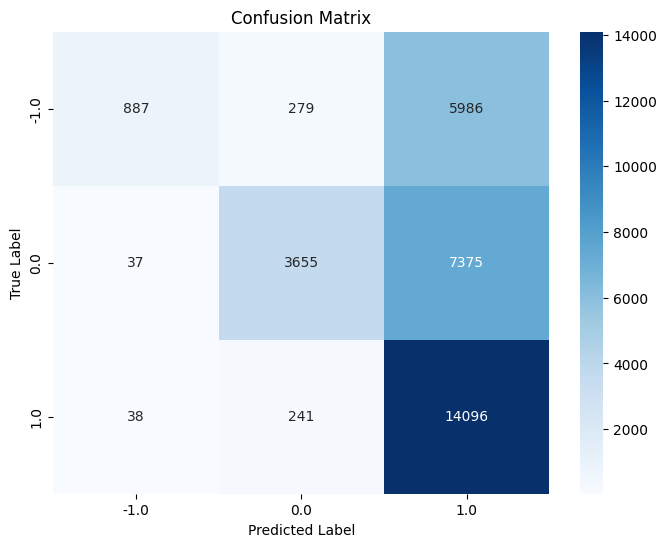

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
file_path = 'Twitter_Data.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset Head:\n", dataset.head())

# Check for missing values
print("\nMissing Values:\n", dataset.isnull().sum())

# Approach 1: Drop rows with missing values
dataset_dropped = dataset.dropna(subset=['clean_text', 'category'])

# Approach 2: Fill missing values with a placeholder
dataset_filled = dataset.copy()
dataset_filled['clean_text'].fillna('', inplace=True)
dataset_filled['category'].fillna(0, inplace=True)  # Assuming 0 for neutral sentiment

# Select one approach (use dataset_dropped or dataset_filled)
dataset = dataset_dropped  # or dataset_filled

# Preprocessing
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

# Applying preprocessing to the text data
dataset['cleaned_text'] = dataset['clean_text'].apply(preprocess_text)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['cleaned_text'], dataset['category'], test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Project 1 Level 2

Predicting House Prices with Linear Regression

Dataset Head:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing Values:
 price               0
area                0
bedrooms            0


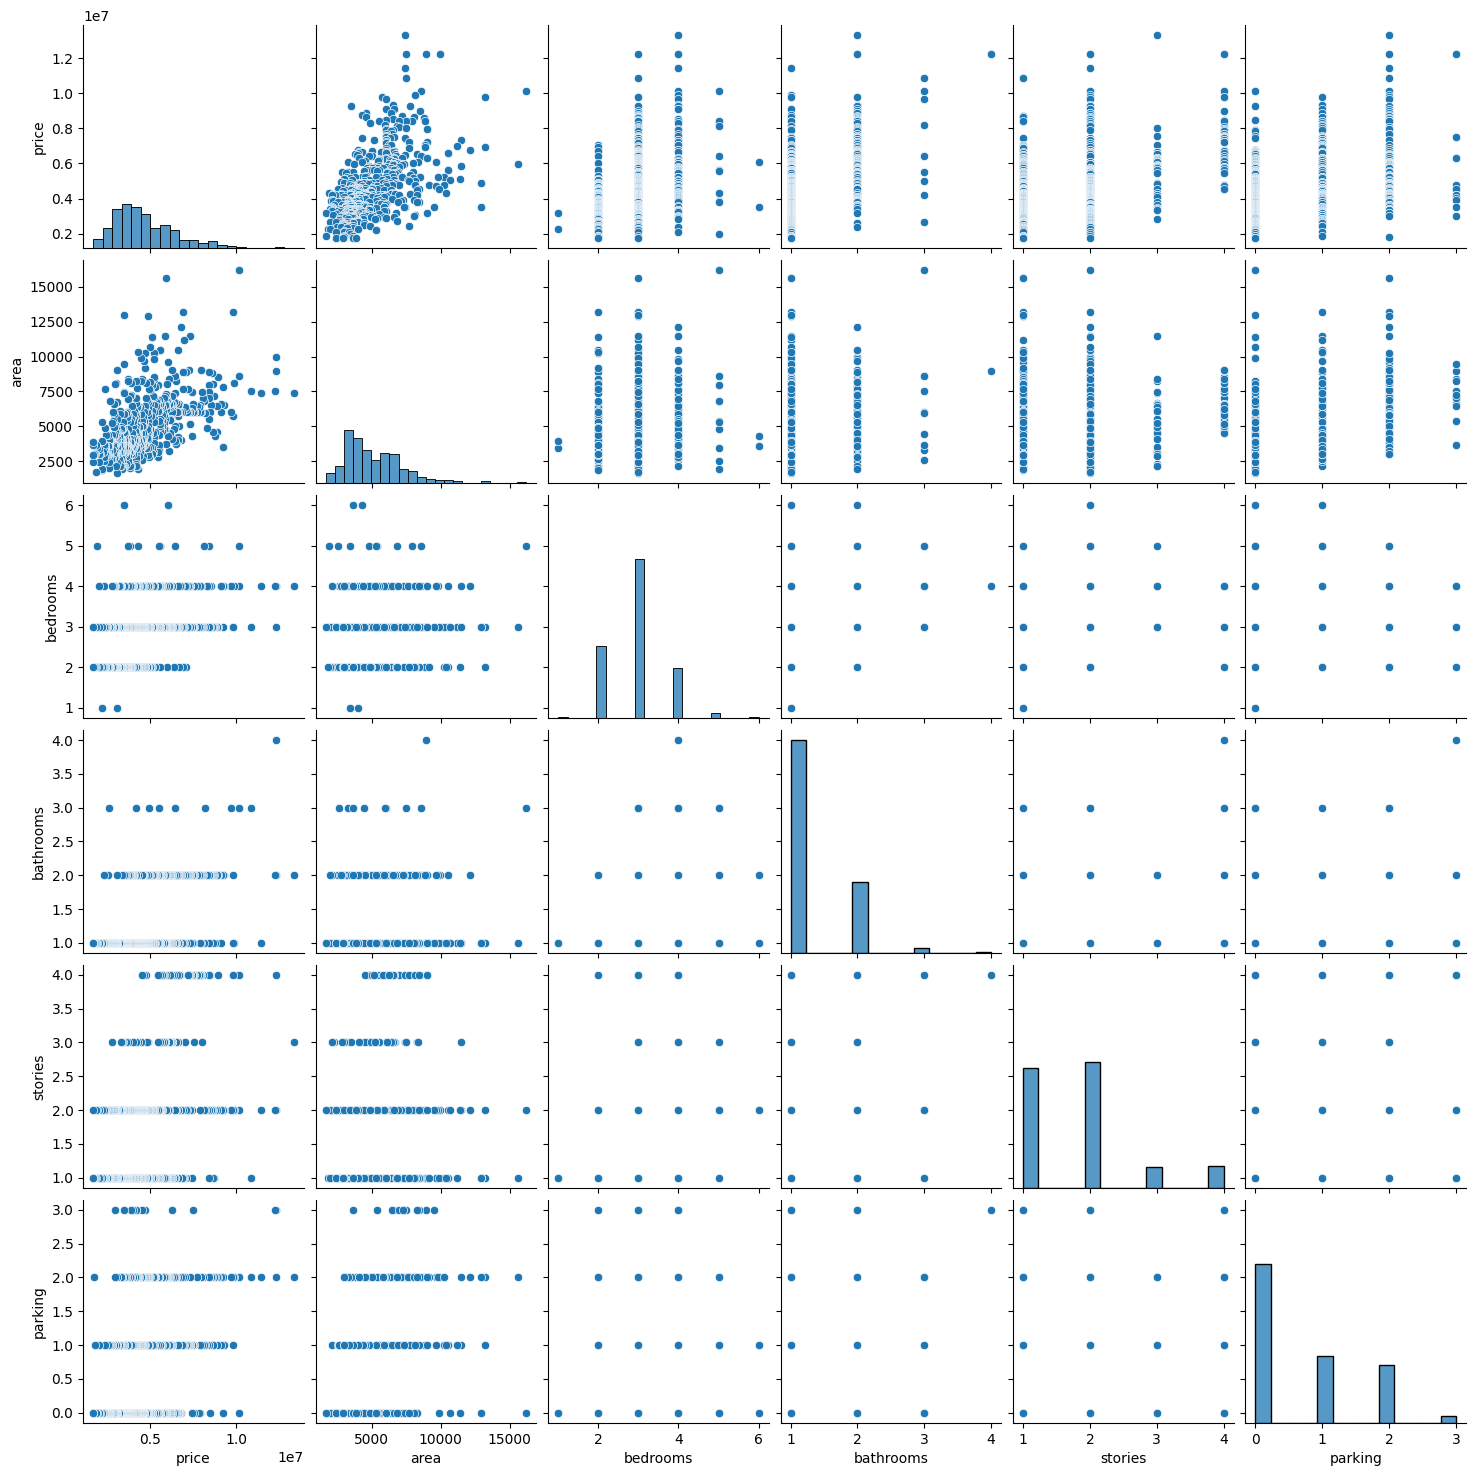


Mean Squared Error: 1754318687330.6682
R-squared: 0.6529242642153175


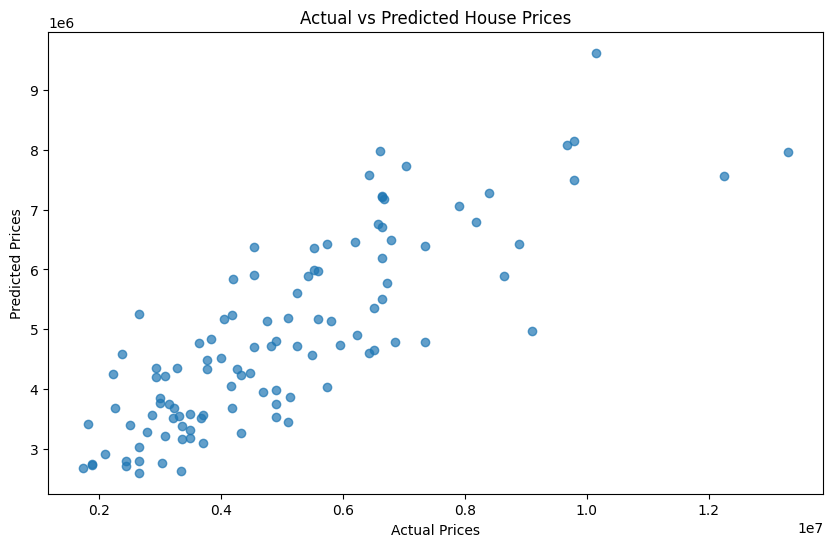

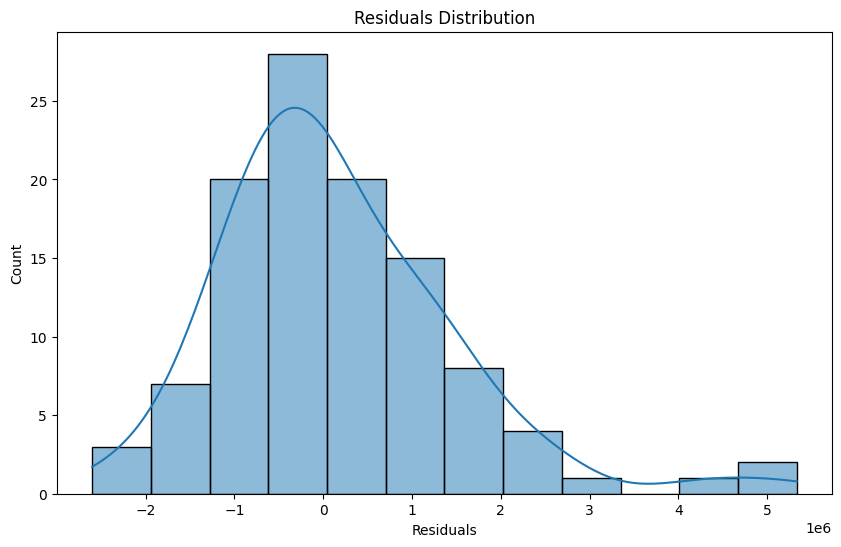

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = 'Housing.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset Head:\n", dataset.head())

# Check for missing values
print("\nMissing Values:\n", dataset.isnull().sum())

# Basic statistics of the dataset
print("\nDataset Description:\n", dataset.describe())

# Data Cleaning: Drop rows with missing values for simplicity
dataset = dataset.dropna()

# Display the cleaned dataset's shape
print("\nCleaned Dataset Shape:", dataset.shape)

# Data Exploration: Plotting distributions of numerical features
sns.pairplot(dataset)
plt.show()

# Splitting the dataset into features (X) and target (y)
X = dataset.drop(['price'], axis=1)
y = dataset['price']

# Identifying numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing Pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline that includes preprocessing and the linear regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


# Project 2 Level 2

Wine Quality Prediction

Dataset Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5

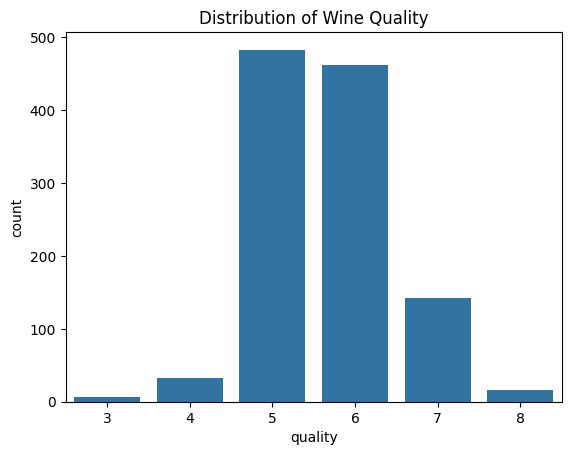


RandomForest Model Evaluation:
Accuracy: 0.6899563318777293
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


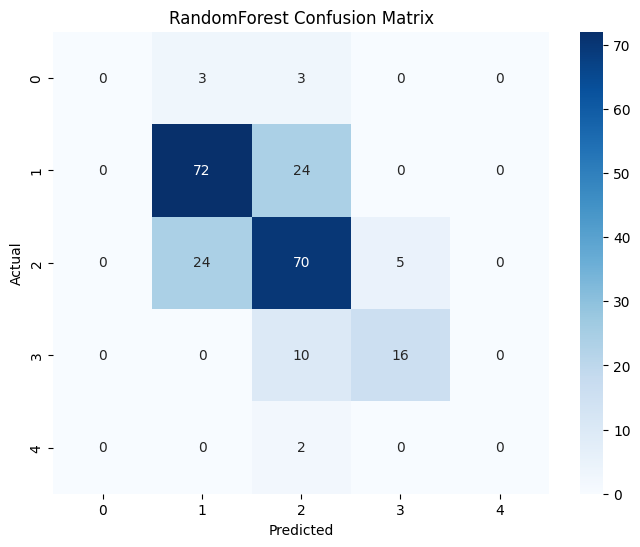


SGDClassifier Model Evaluation:
Accuracy: 0.5851528384279476
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0.59      0.57       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


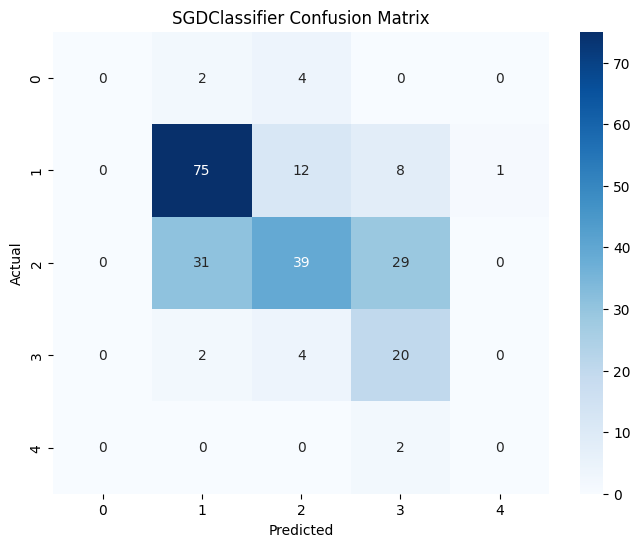


SVC Model Evaluation:
Accuracy: 0.6550218340611353
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.61      0.70      0.65        99
           7       0.69      0.35      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.64      0.66      0.64       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


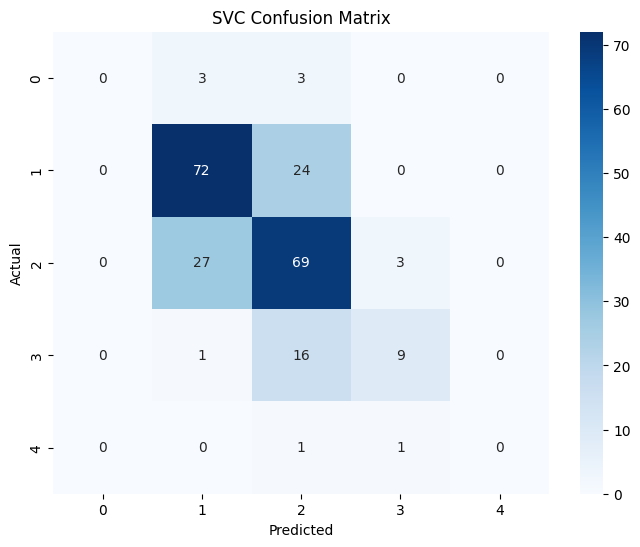

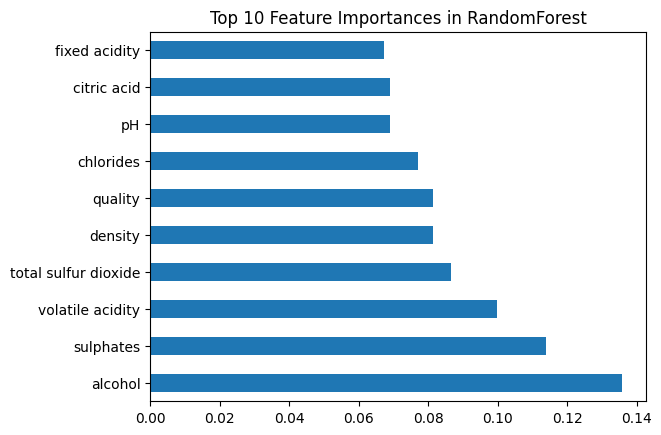

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = 'WineQT.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset Head:\n", dataset.head())

# Check for missing values
print("\nMissing Values:\n", dataset.isnull().sum())

# Basic statistics of the dataset
print("\nDataset Description:\n", dataset.describe())

# Data Cleaning: Drop rows with missing values for simplicity (if any)
dataset = dataset.dropna()

# Display the cleaned dataset's shape
print("\nCleaned Dataset Shape:", dataset.shape)

# Data Exploration: Checking the distribution of the target variable 'quality'
sns.countplot(x='quality', data=dataset)
plt.title('Distribution of Wine Quality')
plt.show()

# Splitting the dataset into features (X) and target (y)
X = dataset.drop(['quality'], axis=1)
y = dataset['quality']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

# Training and evaluating the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Feature Importance for RandomForest
if 'RandomForest' in models:
    rf_model = models['RandomForest']
    feature_importances = pd.Series(rf_model.feature_importances_, index=dataset.columns[:-1])
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances in RandomForest')
    plt.show()


# Project 3 Level 2

Fraud Detection

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-nul

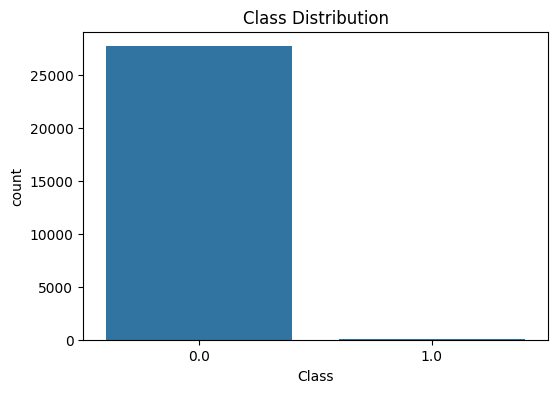

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[5536    9]
 [   6   13]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5545
         1.0       0.59      0.68      0.63        19

    accuracy                           1.00      5564
   macro avg       0.79      0.84      0.82      5564
weighted avg       1.00      1.00      1.00      5564

Accuracy Score:
0.9973040977713875


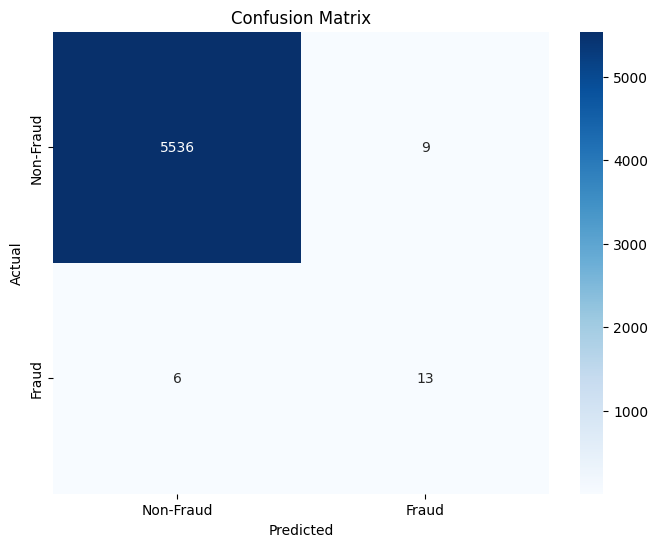

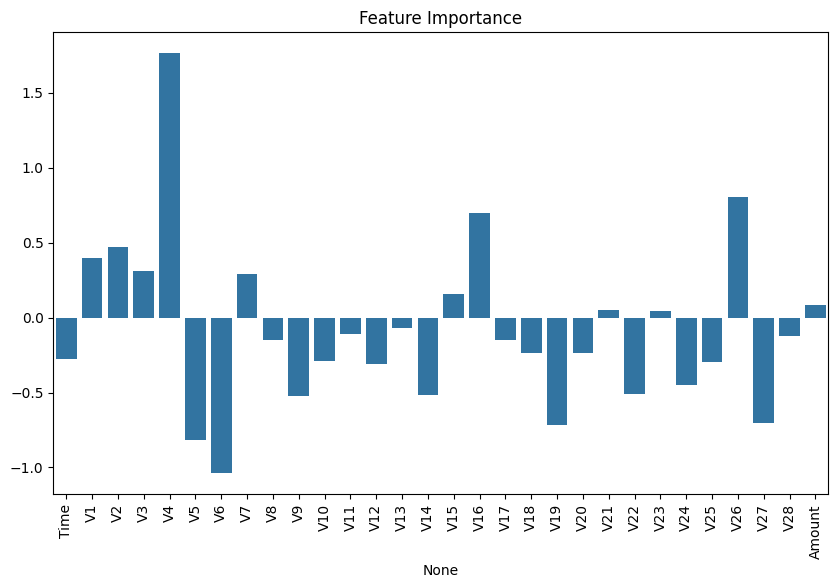

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('creditcard.csv')

# Display basic info
print("Dataset info:")
print(df.info())
print("Dataset description:")
print(df.describe())

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Drop rows with missing values in the target variable
df = df.dropna(subset=['Class'])

# Exploratory Data Analysis (EDA)
print("Class distribution:")
print(df['Class'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Data preprocessing
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model building: Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Visualize feature importance
importance = model.coef_[0]
features = df.columns[:-1]
plt.figure(figsize=(10,6))
sns.barplot(x=features, y=importance)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()


# Project 4 Level 2

Unveiling the Android App Market: Analyzing Google Play Store Data

Apps dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None
Reviews dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries,

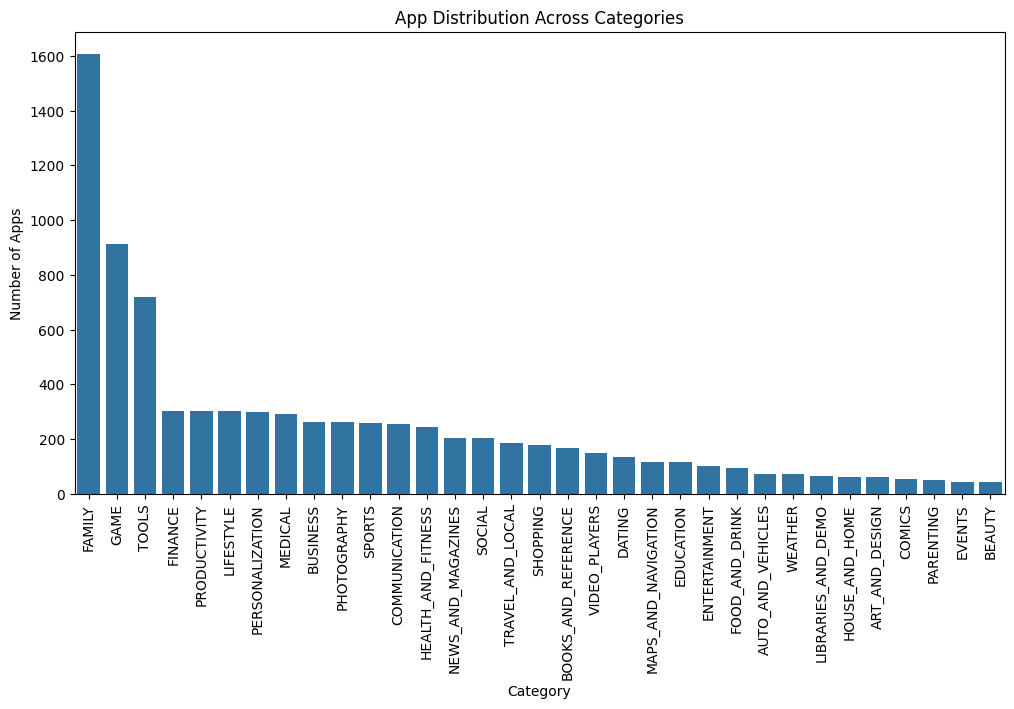

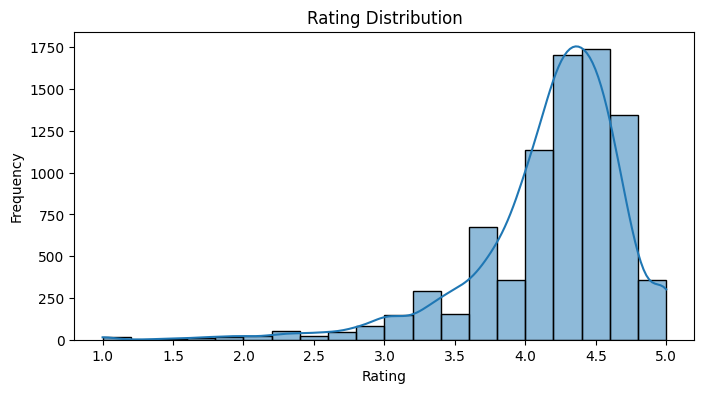

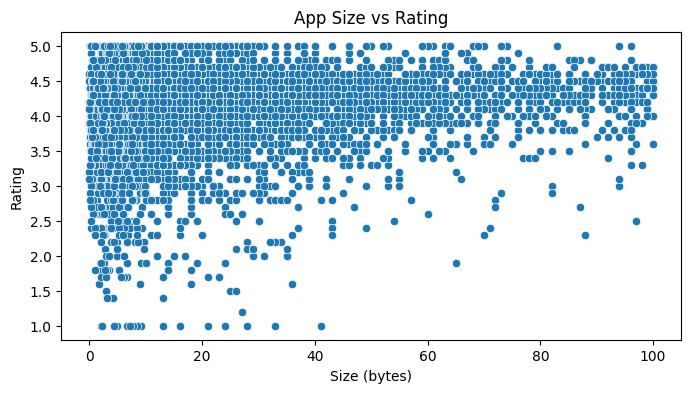

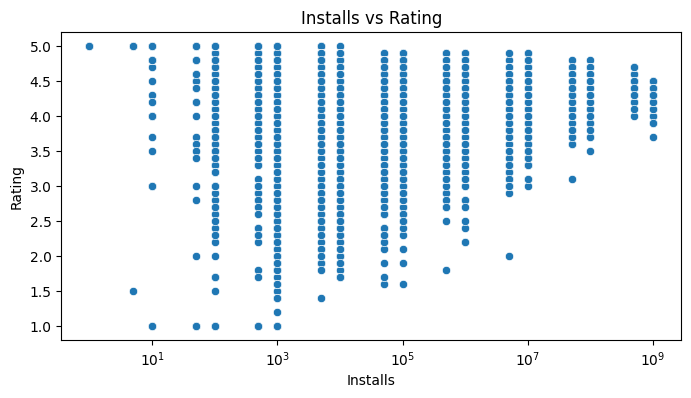

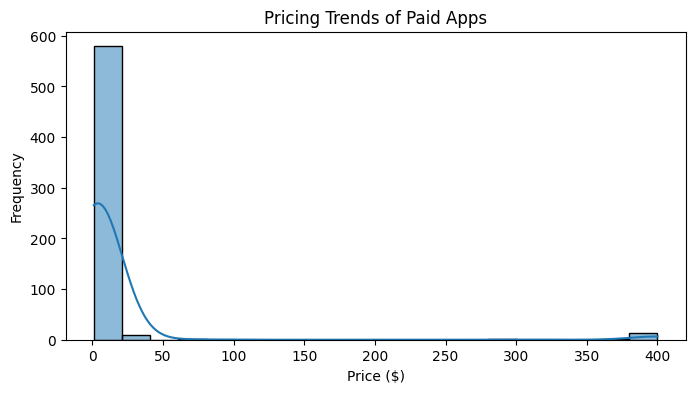

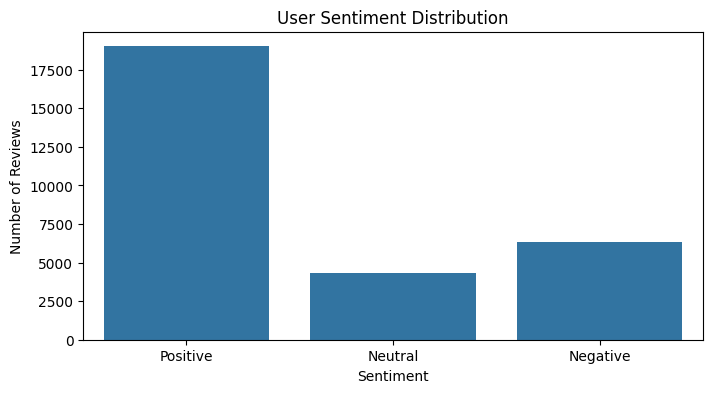

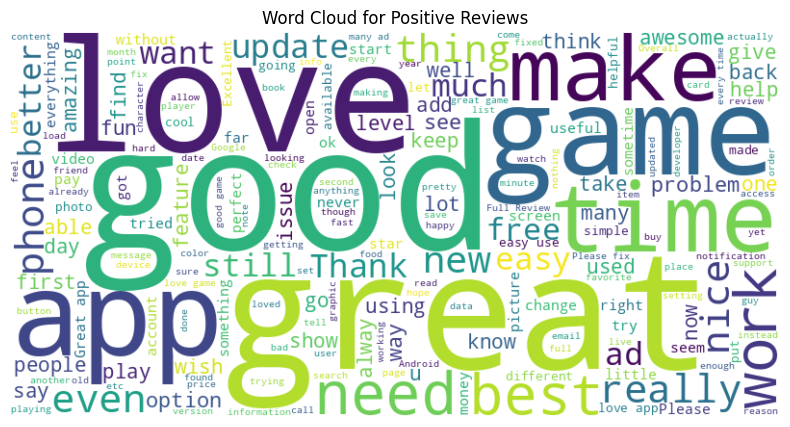

Cleaned Apps dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 8196 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8196 non-null   int64  
 1   App             8196 non-null   object 
 2   Category        8196 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         8196 non-null   int64  
 5   Size            7027 non-null   float64
 6   Installs        8196 non-null   int64  
 7   Type            8196 non-null   object 
 8   Price           8196 non-null   float64
 9   Content Rating  8196 non-null   object 
 10  Genres          8196 non-null   object 
 11  Last Updated    8196 non-null   object 
 12  Current Ver     8192 non-null   object 
 13  Android Ver     8194 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 960.5+ KB
None
Cleaned Reviews dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 29692 e

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px

# Load datasets
apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

# Display basic info
print("Apps dataset info:")
print(apps_df.info())
print("Reviews dataset info:")
print(reviews_df.info())

# Data Cleaning
# Remove duplicates
apps_df.drop_duplicates(subset='App', inplace=True)
reviews_df.drop_duplicates(subset=['App', 'Translated_Review'], inplace=True)

# Handle missing values
apps_df.dropna(subset=['Rating'], inplace=True)
apps_df['Rating'] = apps_df['Rating'].astype(float)

# Ensure 'Size' is treated as string and clean 'Size' column
apps_df['Size'] = apps_df['Size'].astype(str).replace('Varies with device', np.nan)
apps_df['Size'] = apps_df['Size'].str.replace('M', 'e6').str.replace('k', 'e3')

def convert_size(size):
    try:
        return float(size)
    except (ValueError, TypeError):
        return np.nan

apps_df['Size'] = apps_df['Size'].apply(convert_size)

# Clean 'Installs' column
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Clean 'Price' column
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

# Data Preparation
# Convert 'Reviews' column to numeric
apps_df['Reviews'] = apps_df['Reviews'].astype(int)

# Category Exploration
category_counts = apps_df['Category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

# Metrics Analysis
# Rating Distribution
plt.figure(figsize=(8, 4))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Size vs Rating
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Size', y='Rating', data=apps_df)
plt.title('App Size vs Rating')
plt.xlabel('Size (bytes)')
plt.ylabel('Rating')
plt.show()

# Popularity (Installs) vs Rating
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Installs', y='Rating', data=apps_df)
plt.title('Installs vs Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

# Pricing Trends
paid_apps = apps_df[apps_df['Price'] > 0]

plt.figure(figsize=(8, 4))
sns.histplot(paid_apps['Price'], bins=20, kde=True)
plt.title('Pricing Trends of Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Sentiment Analysis
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

def analyze_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

reviews_df['Sentiment'] = reviews_df['Translated_Review'].apply(analyze_sentiment)

sentiment_counts = reviews_df['Sentiment'].value_counts()

plt.figure(figsize=(8, 4))
sns.countplot(x='Sentiment', data=reviews_df)
plt.title('User Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Word Cloud for Positive Reviews
positive_reviews = ' '.join(reviews_df[reviews_df['Sentiment'] == 'Positive']['Translated_Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Interactive Visualization using Plotly
fig = px.scatter(apps_df, x='Rating', y='Reviews', color='Category',
                 size='Installs', hover_data=['App'], title='Rating vs Reviews by Category')
fig.show()

# Display basic info
print("Cleaned Apps dataset info:")
print(apps_df.info())
print("Cleaned Reviews dataset info:")
print(reviews_df.info())


# Project 5 Level 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

<ipython-input-2-c1eea0194640>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = scaler.fit_transform(df[['Amount']])


Logistic Regression Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3167
         1.0       0.86      0.90      0.88        20

    accuracy                           1.00      3187
   macro avg       0.93      0.95      0.94      3187
weighted avg       1.00      1.00      1.00      3187

[[3164    3]
 [   2   18]]
Random Forest Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3167
         1.0       0.90      0.95      0.93        20

    accuracy                           1.00      3187
   macro avg       0.95      0.97      0.96      3187
weighted avg       1.00      1.00      1.00      3187

[[3165    2]
 [   1   19]]
SVM Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3167
         1.0       0.81      0.85      0.83        20

    accuracy                           1.00      3187


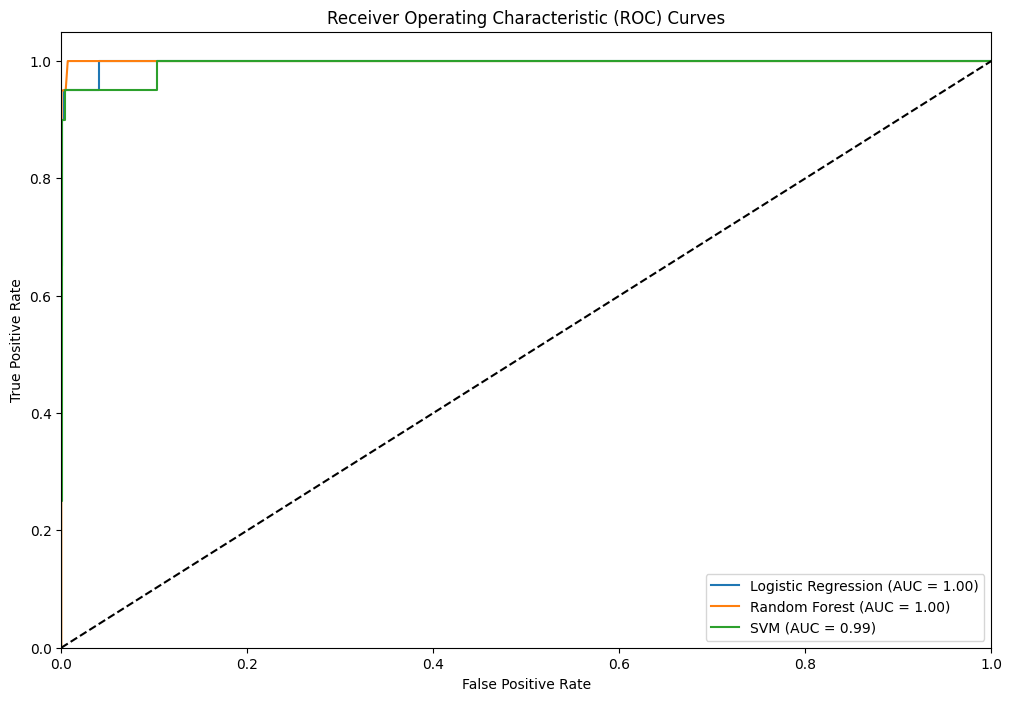

                                                                   0.0  \
Logistic Regression  {'precision': 0.9993682880606444, 'recall': 0....   
Random Forest        {'precision': 0.9996841440303221, 'recall': 0....   
SVM                  {'precision': 0.9990524320909665, 'recall': 0....   

                                                                   1.0  \
Logistic Regression  {'precision': 0.8571428571428571, 'recall': 0....   
Random Forest        {'precision': 0.9047619047619048, 'recall': 0....   
SVM                  {'precision': 0.8095238095238095, 'recall': 0....   

                     accuracy  \
Logistic Regression  0.998431   
Random Forest        0.999059   
SVM                  0.997804   

                                                             macro avg  \
Logistic Regression  {'precision': 0.9282555726017507, 'recall': 0....   
Random Forest        {'precision': 0.9522230243961134, 'recall': 0....   
SVM                  {'precision': 0.90428812080738

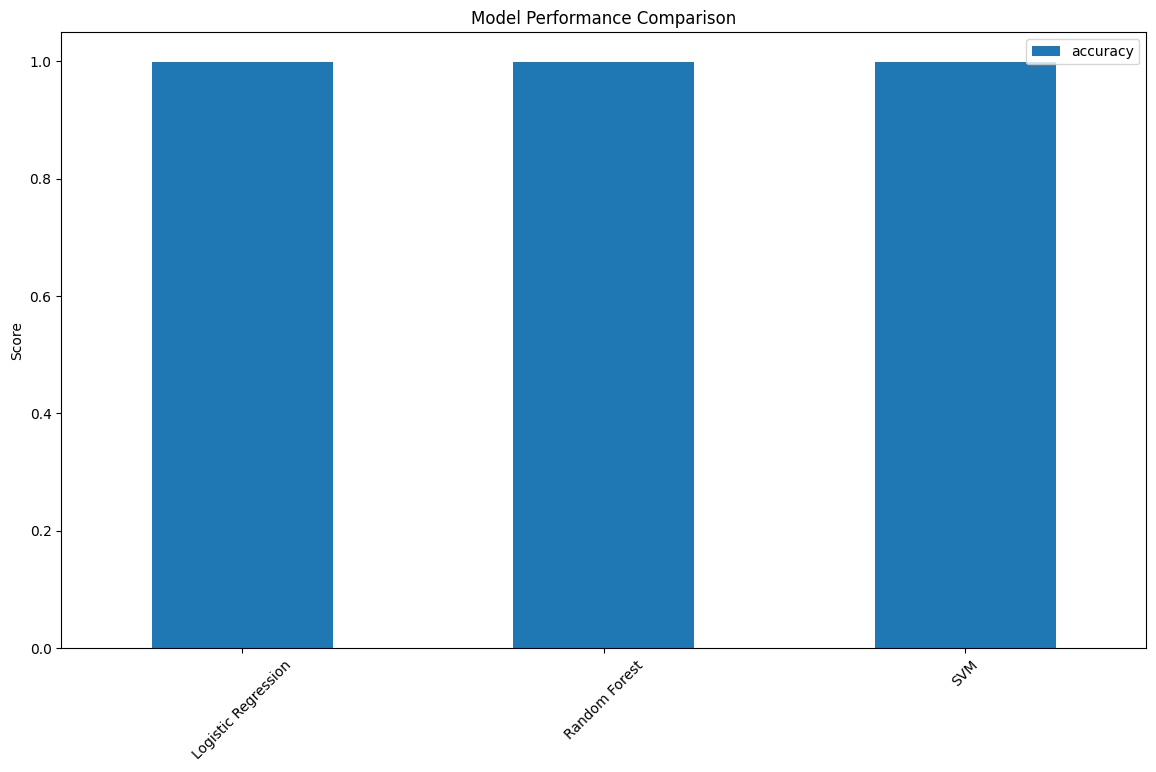

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Step 1: Load and inspect the dataset
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
print(df.head())

# Step 2: Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Since there are very few missing values, we can drop the rows with missing data
df = df.dropna()

# Normalize the 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Feature selection: Using all features for model training
X = df.drop(columns=['Class', 'Time'])
y = df['Class']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Implement and evaluate baseline models
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate models
print("Logistic Regression Evaluation:")
print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))

print("Random Forest Evaluation:")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

print("SVM Evaluation:")
print(classification_report(y_test, svm_predictions))
print(confusion_matrix(y_test, svm_predictions))

# Step 5: Visualization
# Plot ROC curves for all models
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

plt.figure(figsize=(12, 8))

for model_name, model in models.items():
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Step 6: User Experience Simulation
# Simulating user experience could involve analyzing how well the models performed in different scenarios.
# Here, we'll assume user experience is quantified by model performance metrics.

# Step 7: Algorithm Comparison
# Compare models based on metrics like AUC, precision, recall, etc.
comparison = {
    'Logistic Regression': classification_report(y_test, lr_predictions, output_dict=True),
    'Random Forest': classification_report(y_test, rf_predictions, output_dict=True),
    'SVM': classification_report(y_test, svm_predictions, output_dict=True)
}

comparison_df = pd.DataFrame(comparison).T
print(comparison_df)

# Visualize the comparison
comparison_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
